In [1]:
%matplotlib inline

In [2]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import re
import os.path

In [3]:
# test result function
def frobenius_norm(M1, M2):
    #print M1
    #print M2
    total = 0.0
    for a,b in zip(M1, M2):
        for c, d in zip(a, b):
            total += (c - d)*(c - d)
    return total

In [4]:
# dimension of each example in the dataset
d = 15
# k is the top pricipal calculated by the eigenvectors, right now just fix it
k = 5
# fix the learning rate
learning_rate = 0.00001
# preprocess the data
data_set = []
data_set_done = []
if os.path.exists('new_data_1'):
    with open('new_data_1') as data:
        for line in data:
            data_set_done.append(map(float, line.split()))

else:
    with open('adult.data.txt') as data:
        for line in data:
            # '\s' matches whitespace
            tmp = re.sub(r'\s', '', line).split(',')
            data_set.append(tmp)
    print data_set

    feature_vector_size = len(data_set[0])
    print "feature vector is  " ,feature_vector_size
    print "data set size is ", len(data_set)
    tmp = data_set[0]

    # find out which feature is not a digit
    non_digit_index = []
    for i in range (0,feature_vector_size):
        if tmp[i].isdigit():
            continue
        else:
            non_digit_index.append(i)
    print non_digit_index

    # make each string feature to become a number

    # Copy
    modified_data_set= []
    for item in data_set:
        modified_data_set.append(item)


    print "data before processed dimension is ", len(modified_data_set[0])
    #print modified_data_set
    item_list = []
    count = 0
    dimension_to_increase = 0
    # for all the non_digit index, count how many differnt items
    for i in non_digit_index:
        # clear the item list to find different string for same feature
        items = []
        # loop through the whole data set
        for vector in data_set:
            # get the corresponsding item
            tmp = vector[i]
            # it already in the list
            if tmp in items:
                continue
            else:
                # otherwise append to the list
                items.append(tmp)
        dimension_to_increase = dimension_to_increase + len(items)-1
        #print "item is "
        #print items
        #print "\n\n"
        # loop through the whole data set to replace the feature
        for j in range(len(modified_data_set)):
            v = modified_data_set[j]
            #print v
            # get the item in the vector
            #print "accessing ", i+count
            tmp = v[i+count]
            index  = items.index(tmp)
            front = v[0:i+count]
            end = v[i+1+count:len(v)]
            zeros = [0]*len(items)
            zeros[index] = 1
            front.extend(zeros)
            front.extend(end)
            modified_data_set[j] = front
            #print "result is ", modified_data_set[j]
            #v[i] = float(index)
        count = count + len(items)-1
    for v in modified_data_set:
        v = map(float, v)
        data_set_done.append(v)
    print "dimension to increase ", dimension_to_increase
    print "data processed dimension is ", len(data_set_done[0])
    #print data_set_done
    print "size of data set done is ", len(data_set_done)

f = open('new_data', 'w')
for vector in data_set_done:
    for num in vector:
        f.write(str(num)+" ")
    f.write("\n")
f.close()


In [5]:
# pre-process the data
# find the largest item in the column and divide by that number
d = len(data_set_done[0])
largest = 0.0
largest_list = []

# loop each column and find the largest element
for i in range(0,d):
    largest = 0.0
    for item in data_set_done:
        if item[i] >= largest:
            largest = item[i]
    largest_list.append(largest)

tmp = 0.0
for i in range(0,d):
    tmp = largest_list[i]
    # divide all the items by the largest one to normalize
    for item in data_set_done:
        item[i] = item[i]/tmp
    
f = open('new_data_1', 'w')
for vector in data_set_done:
    for num in vector:
        f.write(str(num)+" ")
    f.write("\n")
f.close()

In [16]:
# helper function to normalize a vector
# v = np.array([[x1,x2]])
def normalizeVector(v):
    #print "v is ", v
    distance = 0.0
    for i in v:
        for j in i:
            distance = distance + j**2
            # for k in j:
            # 	print "k is ", k
                # distance = distance + k**2
    distance = math.sqrt(distance)
    v = v/distance
    #print "v returned ", v
    return v

# helper function to calculate the distance between two vectors
# v1 = np.array([[x1,x2]])
# v2 = np.array([[x1,x2]])
def distance(v1,v2):
    distance = 0.0
    for i,j in zip(v1,v2):
        for x, y in zip(i, j):
            distance = distance + (x- y)**2
    distance = math.sqrt(distance)
    return distance

# v is np.array([[x1,x2,x3....]])
# v is column-major vector
def testFunction(v):
    total = 0.0
    for item in data_set_done:
        tmp = np.array([item])
        dotProduct = np.dot(tmp,v) # dotproduct should be a constant
        #print "dotProduct is ", dotProduct
        dotProduct = dotProduct * v # dotproduct is a column major vector
        total = total + distance(tmp,dotProduct)   
    return total

In [9]:
# data set size covariance matrix M
N = len(data_set_done)
M = np.array(data_set_done[0]) * np.transpose(np.array(data_set_done[0])) / N
for i in range(1, len(data_set_done)):
    M = M + (np.array([data_set_done[i]]) * np.transpose(np.array([data_set_done[i]]))) / N
print "M is "
print M

U, s, V = np.linalg.svd(M, full_matrices=True)

M is 
[[  2.06740636e-01   1.74847892e-02   3.89927964e-02 ...,   1.09196755e-05
    3.10304761e-01   1.18397606e-01]
 [  1.74598446e-02   3.98636406e-02   0.00000000e+00 ...,   0.00000000e+00
    2.90224502e-02   1.08411904e-02]
 [  3.89985634e-02   3.07115875e-05   7.80381438e-02 ...,   0.00000000e+00
    5.58336660e-02   2.22351893e-02]
 ..., 
 [  1.66866292e-05   3.07115875e-05   0.00000000e+00 ...,   3.07115875e-05
    6.14231750e-05   0.00000000e+00]
 [  3.10279817e-01   2.90224502e-02   5.58029545e-02 ...,   3.07115875e-05
    7.59190443e-01   0.00000000e+00]
 [  1.18403373e-01   1.08719020e-02   2.22351893e-02 ...,   0.00000000e+00
    3.07115875e-05   2.40809557e-01]]


learning rate is  1.0
normalized v1  [[ 0.15598996]
 [ 0.28700403]
 [ 0.04527219]
 [ 0.03358845]
 [ 0.03563204]
 [ 0.01952069]
 [ 0.03764365]
 [ 0.04206939]
 [ 0.03317626]
 [ 0.04444333]
 [ 0.05519576]
 [ 0.31363725]
 [ 0.0254262 ]
 [ 0.00534695]
 [ 0.04311841]
 [ 0.02095052]
 [ 0.00757247]
 [ 0.01730019]
 [ 0.02268111]
 [ 0.00255994]
 [ 0.03606928]
 [ 0.03046063]
 [ 0.00488392]
 [ 0.01629025]
 [ 0.04014405]
 [ 0.00409944]
 [ 0.00640266]
 [ 0.25479628]
 [ 0.29617254]
 [ 0.02806453]
 [ 0.04153102]
 [ 0.00114407]
 [ 0.01184739]
 [ 0.01445974]
 [ 0.01852699]
 [ 0.32302559]
 [ 0.02376575]
 [ 0.04430863]
 [ 0.0390454 ]
 [ 0.01630736]
 [ 0.02983277]
 [ 0.02173122]
 [ 0.01370758]
 [ 0.00716249]
 [ 0.03633445]
 [ 0.02126062]
 [ 0.00551272]
 [ 0.03182955]
 [ 0.0044127 ]
 [ 0.00549945]
 [ 0.28063285]
 [ 0.03509968]
 [ 0.01766005]
 [ 0.03014938]
 [ 0.02874336]
 [ 0.02692349]
 [ 0.28386776]
 [ 0.01526998]
 [ 0.04643536]
 [ 0.02547488]
 [ 0.01875872]
 [ 0.29050906]
 [ 0.02686281]
 [ 0.03846295]
 [ 

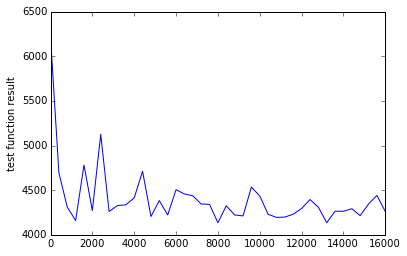

global v1,  [[  1.91477948e-001]
 [  5.61310499e-004]
 [  5.87151862e-002]
 [  3.26513404e-001]
 [  1.25398418e-002]
 [  1.72968208e-002]
 [  4.41459039e-003]
 [  1.37798215e-002]
 [  2.10414411e-012]
 [  2.47992084e-028]
 [  5.19289036e-002]
 [  5.71508291e-002]
 [  1.45709813e-001]
 [  1.06509179e-002]
 [  1.33309533e-002]
 [  1.19565701e-002]
 [  6.43162173e-002]
 [  2.08357392e-002]
 [  6.32086965e-002]
 [  8.99644562e-003]
 [  4.88733739e-003]
 [  2.66748518e-002]
 [  8.23223136e-005]
 [  5.94232104e-003]
 [  1.72133720e-005]
 [  2.45816337e-023]
 [  6.07473165e-005]
 [  2.82158480e-001]
 [  1.24332376e-001]
 [  2.09362879e-001]
 [  5.28511144e-002]
 [  5.79653633e-003]
 [  1.92145897e-002]
 [  4.59891692e-018]
 [  2.22634802e-002]
 [  3.08500663e-002]
 [  5.48789113e-002]
 [  1.04613695e-002]
 [  7.64819448e-002]
 [  2.02810128e-002]
 [  6.95383149e-002]
 [  7.32539889e-002]
 [  1.90453522e-002]
 [  6.31889574e-003]
 [  5.35649039e-002]
 [  6.75480746e-003]
 [  4.41459039e-003]
 

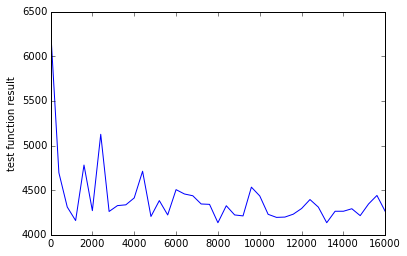

global v1,  [[  1.91477948e-01]
 [  5.61310499e-04]
 [  5.87151862e-02]
 [  3.26513404e-01]
 [  1.25398418e-02]
 [  1.72968208e-02]
 [  4.41459039e-03]
 [  1.37798215e-02]
 [  2.10414411e-12]
 [  2.47992084e-28]
 [  5.19289036e-02]
 [  5.71508291e-02]
 [  1.45709813e-01]
 [  1.06509179e-02]
 [  1.33309533e-02]
 [  1.19565701e-02]
 [  6.43162173e-02]
 [  2.08357392e-02]
 [  6.32086965e-02]
 [  8.99644562e-03]
 [  4.88733739e-03]
 [  2.66748518e-02]
 [  8.23223136e-05]
 [  5.94232104e-03]
 [  1.72133720e-05]
 [  2.45816337e-23]
 [  6.07473165e-05]
 [  2.82158480e-01]
 [  1.24332376e-01]
 [  2.09362879e-01]
 [  5.28511144e-02]
 [  5.79653633e-03]
 [  1.92145897e-02]
 [  4.59891692e-18]
 [  2.22634802e-02]
 [  3.08500663e-02]
 [  5.48789113e-02]
 [  1.04613695e-02]
 [  7.64819448e-02]
 [  2.02810128e-02]
 [  6.95383149e-02]
 [  7.32539889e-02]
 [  1.90453522e-02]
 [  6.31889574e-03]
 [  5.35649039e-02]
 [  6.75480746e-03]
 [  4.41459039e-03]
 [  7.95044853e-03]
 [  2.63687654e-05]
 [  8.43

In [17]:
'''
    Implement Oja's rule to find the top k pricipal components of the dataset
'''

# initialize v0 as a vector drawn uniformly at raondom on the surface of a d-dimensional sphere
d = len(data_set_done[0])
v1 = []
prev_v = [] # record the previous v1 to test convergence
s = 0.0
t = len(data_set_done) # t is the data set lenght: how many data points there are
learning_rate = 1.0
print "learning rate is ",learning_rate
# random intialize a vector from a d-dim sphere
for i in range(0,d):
    tmp = np.random.random()
    s = s + tmp**2
    v1.append(tmp)
    prev_v.append(0.0)

s = math.sqrt(s)
#print "s is ", s
# normalize v1 
for i in range(0,d):
    v1[i] = v1[i] * 1.0/ s

a = np.dot(np.array([data_set_done[0]]),np.transpose(np.array([data_set_done[0]])))
#print a # a is a scalar
#print data_set_done[0] 
#print np.multiply(a,data_set_done[0]) # result is a vector

dis = 0.0
loop = 0.0
# test convergence
#print "distance is ", distance(prev_v,v1)
v1 = np.array([v1]) # v1 type np.array([[x1,x2]]) 
v1 = np.transpose(v1) # let v1 becomese a column major vector
prev_v = v1
testResult = []
tPoint = []
# stil have the infinite problem, need to normalize feature
while True:
    loop = loop + 1
    testResult = []
    tPoint = []
    #print "loop is ", loop
    for i in range(0, len(data_set_done)/2):
        learning_rate = 1.0/math.sqrt(i+1)
        tmp = data_set_done[i] # convert to right form
        tmp = np.array([tmp])
        #print "dataset ", tmp # array([[]])
        #print "tranpose xt is ", np.transpose(tmp)
        #print "dot result ", np.dot(np.transpose(tmp),tmp)
        b = np.dot(np.transpose(tmp),tmp)
        b = np.dot(b,v1) # result will be a 110 * 1 vector
        #print "times learning plus ", tmp + learning_rate * b
        v1 = v1 + learning_rate * b 
        #print "v1 only sum ", v1
        v1 = normalizeVector(v1)
        #print "normalized v1 ", v1
        if i % 400 == 0:
            tPoint.append(i)
            test = testFunction(v1)
            testResult.append(test)
        #print "v1 local", v1
    #print "global v1, ", v1
    #if loop > 1:
    # right now use distance to test convergence
    #plt.plot(tPoint,testResult)
    print "test result is ", testResult
    plt.plot(tPoint, testResult, '-')
    #plt.axis([0, len(data_set_done), 0, 5000])
    plt.ylabel('test function result')
    plt.show()
    print "global v1, ", v1
    dis = distance(prev_v,v1)
    print "distance ", dis
    if dis <= 0.001:
            break
    prev_v = v1